In [1]:
import os, sys, argparse
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cm
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
import seaborn as sns

In [2]:
def get_count_df(df, aa_col, cols, vals):
    
    counts = []
    
    for i in range(len(cols)):
        current_col = cols[i]
        current_df = df[df[current_col] == vals[i]]
        counts.append(len(current_df[aa_col].unique()))
        
    return counts

In [3]:
def get_functions(df, aa_col, cols, vals, labels):
    
    subset_df = df[[aa_col] + cols] 
    
    subset_df = subset_df.drop_duplicates()
    
    subset_counts = get_count_df(subset_df, aa_col, cols, vals)
    
    count_df = pd.DataFrame()
    count_df['Function'] = labels
    count_df['Count'] = subset_counts
    
    return count_df

In [4]:
def get_normalized_functions(df, aa_col, cols, vals, labels):
    
    subset_df = df[[aa_col] + cols] 
    
    subset_df = subset_df.drop_duplicates()
    
    subset_counts = get_count_df(subset_df, aa_col, cols, vals)
    
    count_df = pd.DataFrame()
    count_df['Function'] = labels
    count_df['Count'] = subset_counts
    count_df['Percent'] = count_df['Count'].map(lambda x: (float(x)/sum(subset_counts))*100)
    
    return count_df

In [5]:
def get_new_bar_plot(df, xcol, ycol, name, colors, sz, ylim):
    
    #create bar chart
    fig = plt.figure(figsize =(8, 6))
    
    sns.barplot(data=df, x=xcol, y=ycol, palette = colors)
    
    plt.xlabel(xcol, size = sz)
    plt.ylabel(ycol, size = sz)
    
    plt.xticks(size = sz) 
    plt.yticks(size = sz)
    
    plt.ylim(0, ylim)
    
    plt.savefig(name + '_function_barplot.png', dpi = 300, bbox_inches = "tight")
    plt.show()


In [11]:
cd = os.getcwd()
cd

'/Users/lisaboatner/Documents/Documents - Lisa’s MacBook Pro - 1/GitHub/iaa_statistics/residue_functions'

In [13]:
date = '240930'

# 

# Read Cysteine Annotations

In [17]:
c_df = pd.read_csv('https://www.dropbox.com/scl/fi/lw68ilxy97o8qjdnyu0vo/240509_2401_cysteine_annotations.csv?rlkey=u0t3uybu0iv84dp0qpwevl1gi&st=nptqnurn&dl=1')

/var/folders/4c/kr7lv7195d92x2l4kyj4r3z00000gn/T/ipykernel_6502/463603083.py:1: DtypeWarning: Columns (10,12,16,26,27,29,31,53,57,62,64,65) have mixed types. Specify dtype option on import or set low_memory=False.
  c_df = pd.read_csv('https://www.dropbox.com/scl/fi/lw68ilxy97o8qjdnyu0vo/240509_2401_cysteine_annotations.csv?rlkey=u0t3uybu0iv84dp0qpwevl1gi&st=nptqnurn&dl=1')


In [18]:
c_df.head()

,proteinid,cysteineid,pdb,resolved_in_pdb,structureid,freesasa_max,freesasa_avg,freesasa_std,freesasa_vals,sec,...,yang_wang_ligandable,burton_backus_ligandable,castellon_backus_ligandable,acrylamide,bromoacetamide,chloroacetamide,dimethylfumarate,other,phenylpropiolate,ratio_mean
0,A0A087X1C5,A0A087X1C5_C57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A0A087X1C5,A0A087X1C5_C159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A0A087X1C5,A0A087X1C5_C161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A0A087X1C5,A0A087X1C5_C191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A0A087X1C5,A0A087X1C5_C337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 

# Read IsoTOP File

In [23]:
i_df = pd.read_csv('../data/230109_isotop_pdb.csv')

In [25]:
i_df.head()

,identifier,protein,description,peptides,gene,2022_count,2019_count,2010_count,experiment_count,isotop-3_median,...,isotop-20_median,isotop-21_median,isotop-22_median,isotop-23_median,isotop-24_median,mean,sd,Entry,PDB,Classification
0,Q5SRE5_C9,Q5SRE5,Nucleoporin NUP188 homolog,AAAAGGPC*VR,NUP188,13.0,NaN,NaN,13,3.537341,...,NaN,NaN,NaN,NaN,NaN,2.888758,0.777620,Q5SRE5,5IJO;7R5K;,"Chaperone, Transporter, Channel, Receptor"
1,Q9NRL3_C17,Q9NRL3,Striatin-4,AAAAVAAAASSC*RPLGSGAGPGPTGAAPVSAPAPGPGPAGK,STRN4,7.0,NaN,NaN,7,NaN,...,NaN,NaN,NaN,NaN,NaN,4.871786,1.679853,Q9NRL3,NaN,"Scaffolding, Modulator, Adaptor"
2,Q96C19_C172,Q96C19,EF-hand domain-containing protein D2,KAAAGELQEDSGLC*VLAR;AAAGELQEDSGLC*VLAR,EFHD2,13.0,5.0,1.0,19,2.250133,...,NaN,NaN,NaN,NaN,NaN,2.377649,1.301613,Q96C19,5H0P;5I2L;5I2O;5I2Q;,Nucleic Acid and Small Molecule Binding
3,P0DMV8_C17,P0DMV8,Heat shock 70 kDa protein 1A,AAAIGIDLGTTYSC*VGVFQHGK;AAAIGIDLGTTYSC*VGVFQHG...,HSPA1A,13.0,NaN,NaN,13,10.980129,...,NaN,NaN,NaN,NaN,NaN,6.718041,3.760279,P0DMV8,1HJO;1S3X;1XQS;2E88;2E8A;2LMG;3A8Y;3ATU;3ATV;3...,"Chaperone, Transporter, Channel, Receptor"
4,P20810_C408,P20810,Calpastatin,AAAPAPVSEAVC*R,CAST,13.0,NaN,NaN,13,3.719817,...,NaN,NaN,NaN,NaN,NaN,3.621821,0.852873,P20810,NaN,Enzyme


# 

# Merge Annotations 

In [29]:
df = pd.merge(i_df, c_df, left_on = 'identifier', right_on = 'cysteineid', how = 'left')

In [31]:
df.head()

,identifier,protein,description,peptides,gene,2022_count,2019_count,2010_count,experiment_count,isotop-3_median,...,yang_wang_ligandable,burton_backus_ligandable,castellon_backus_ligandable,acrylamide,bromoacetamide,chloroacetamide,dimethylfumarate,other,phenylpropiolate,ratio_mean
0,Q5SRE5_C9,Q5SRE5,Nucleoporin NUP188 homolog,AAAAGGPC*VR,NUP188,13.0,NaN,NaN,13,3.537341,...,NaN,yes,yes,NaN,NaN,yes,NaN,NaN,yes,2.888758
1,Q9NRL3_C17,Q9NRL3,Striatin-4,AAAAVAAAASSC*RPLGSGAGPGPTGAAPVSAPAPGPGPAGK,STRN4,7.0,NaN,NaN,7,NaN,...,NaN,NaN,NaN,yes,NaN,yes,NaN,NaN,NaN,4.871786
2,Q96C19_C172,Q96C19,EF-hand domain-containing protein D2,KAAAGELQEDSGLC*VLAR;AAAGELQEDSGLC*VLAR,EFHD2,13.0,5.0,1.0,19,2.250133,...,NaN,yes,NaN,yes,NaN,yes,NaN,yes,NaN,2.377649
3,P0DMV8_C17,P0DMV8,Heat shock 70 kDa protein 1A,AAAIGIDLGTTYSC*VGVFQHGK;AAAIGIDLGTTYSC*VGVFQHG...,HSPA1A,13.0,NaN,NaN,13,10.980129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.718041
4,P20810_C408,P20810,Calpastatin,AAAPAPVSEAVC*R,CAST,13.0,NaN,NaN,13,3.719817,...,NaN,yes,NaN,yes,NaN,yes,NaN,NaN,NaN,3.621821


In [33]:
df = df.drop(columns = ['Classification_x'])

In [35]:
df = df.rename(columns = {'Classification_y': 'Classification'})

In [37]:
df.columns.to_list()

['identifier',
 'protein',
 'description',
 'peptides',
 'gene',
 '2022_count',
 '2019_count',
 '2010_count',
 'experiment_count',
 'isotop-3_median',
 'isotop-11_median',
 'isotop-6_median',
 'isotop-5_median',
 'isotop-12_median',
 'isotop-9_median',
 'isotop-7_median',
 'isotop-10_median',
 'isotop-2_median',
 'isotop-1_median',
 'isotop-13_median',
 'isotop-8_median',
 'isotop-4_median',
 'isotop-14_median',
 'isotop-15_median',
 'isotop-16_median',
 'isotop-17_median',
 'isotop-18_median',
 'isotop-19_median',
 'isotop-20_median',
 'isotop-21_median',
 'isotop-22_median',
 'isotop-23_median',
 'isotop-24_median',
 'mean',
 'sd',
 'Entry',
 'PDB',
 'proteinid',
 'cysteineid',
 'pdb',
 'resolved_in_pdb',
 'structureid',
 'freesasa_max',
 'freesasa_avg',
 'freesasa_std',
 'freesasa_vals',
 'sec',
 'disordered',
 'disulfide',
 'redox',
 'zinc_finger',
 'zinc_binding',
 'metal_binding',
 'active_region',
 'binding_region',
 'is_as',
 'near_as_1D',
 'near_as_neighbors',
 'as_category',


In [41]:
as_df = df[(df['active_region'] == 'yes') | (df['as_category'] == 'yes')]
as_ids = list(as_df['identifier'].unique())
len(as_ids)

201

In [43]:
df['active_site'] = np.where(df['identifier'].isin(as_ids), 'yes', None)

In [45]:
bs_df = df[(df['binding_region'] == 'yes') | (df['metal_binding'] == 'yes') | (df['bs_category'] == 'yes')]
bs_ids = list(bs_df['identifier'].unique())
len(bs_ids)

792

In [47]:
df['binding_site'] = np.where(df['identifier'].isin(bs_ids), 'yes', None)

In [49]:
no_function_df = df[(df['active_site'] != 'yes') & (df['binding_site'] != 'yes') & (df['disordered'] != 'yes') & (df['disulfide'] != 'yes') & (df['redox'] != 'yes')]
no_function_df[['identifier', 'active_site', 'binding_site', 'disordered', 'disulfide', 'redox']]

,identifier,active_site,binding_site,disordered,disulfide,redox
0,Q5SRE5_C9,None,None,NaN,NaN,NaN
1,Q9NRL3_C17,None,None,NaN,NaN,NaN
2,Q96C19_C172,None,None,NaN,NaN,NaN
4,P20810_C408,None,None,NaN,NaN,NaN
5,Q96BN8_C47,None,None,NaN,NaN,NaN
...,...,...,...,...,...,...
9778,Q9UMR2_C393,None,None,NaN,NaN,NaN
9779,Q9Y365_C74,None,None,NaN,NaN,NaN
9780,Q9Y365_C75,None,None,NaN,NaN,NaN
9781,Q9Y3F4_C340,None,None,NaN,NaN,NaN


In [51]:
no_function_ids = list(no_function_df['identifier'].unique())

# Subset by Ratio 

In [57]:
h_df = df[df['mean'] <= 2.3]
l_df = df[df['mean'] >= 10]
m_df = df[(df['mean'] > 2.3) & (df['mean'] < 10)]

In [59]:
def get_target(df):
    vals = []
    
    for index, row in df.iterrows():
        if row['mean'] <= 2.3:
            vals.append('High')
        elif row['mean'] >= 10:
            vals.append('Low')
        else:
            vals.append('Medium')
            
    df['Reactivity'] = vals
    
    return df

In [61]:
df = get_target(df)

In [63]:
df.head()

,identifier,protein,description,peptides,gene,2022_count,2019_count,2010_count,experiment_count,isotop-3_median,...,bromoacetamide,chloroacetamide,dimethylfumarate,other,phenylpropiolate,ratio_mean,active_site,binding_site,unknown,Reactivity
0,Q5SRE5_C9,Q5SRE5,Nucleoporin NUP188 homolog,AAAAGGPC*VR,NUP188,13.0,NaN,NaN,13,3.537341,...,NaN,yes,NaN,NaN,yes,2.888758,None,None,yes,Medium
1,Q9NRL3_C17,Q9NRL3,Striatin-4,AAAAVAAAASSC*RPLGSGAGPGPTGAAPVSAPAPGPGPAGK,STRN4,7.0,NaN,NaN,7,NaN,...,NaN,yes,NaN,NaN,NaN,4.871786,None,None,yes,Medium
2,Q96C19_C172,Q96C19,EF-hand domain-containing protein D2,KAAAGELQEDSGLC*VLAR;AAAGELQEDSGLC*VLAR,EFHD2,13.0,5.0,1.0,19,2.250133,...,NaN,yes,NaN,yes,NaN,2.377649,None,None,yes,Medium
3,P0DMV8_C17,P0DMV8,Heat shock 70 kDa protein 1A,AAAIGIDLGTTYSC*VGVFQHGK;AAAIGIDLGTTYSC*VGVFQHG...,HSPA1A,13.0,NaN,NaN,13,10.980129,...,NaN,NaN,NaN,NaN,NaN,6.718041,None,yes,None,Medium
4,P20810_C408,P20810,Calpastatin,AAAPAPVSEAVC*R,CAST,13.0,NaN,NaN,13,3.719817,...,NaN,yes,NaN,NaN,NaN,3.621821,None,None,yes,Medium


# Get Function Counts

In [66]:
function_cols = ['active_site', 'binding_site', 'disordered', 'disulfide', 'redox', 'unknown']
function_labels = ['Active\nSite', 'Binding\nSite', 'Disordered\nRegion', 'Disulfide\nBond', 'Redox\nActive', 'NA']
function_vals = ['yes', 'yes', 'yes', 'yes', 'yes', 'yes']

In [68]:
h_function_df = get_functions(h_df, 'identifier', function_cols, function_vals, function_labels)
h_function_df

,Function,Count
0,Active\nSite,53
1,Binding\nSite,68
2,Disordered\nRegion,10
3,Disulfide\nBond,41
4,Redox\nActive,27
5,NA,677


In [70]:
h_norm_function_df = get_normalized_functions(h_df, 'identifier', function_cols, function_vals, function_labels)
h_norm_function_df

,Function,Count,Percent
0,Active\nSite,53,6.050228
1,Binding\nSite,68,7.762557
2,Disordered\nRegion,10,1.141553
3,Disulfide\nBond,41,4.680365
4,Redox\nActive,27,3.082192
5,NA,677,77.283105


In [72]:
l_function_df = get_functions(l_df, 'identifier', function_cols, function_vals, function_labels)
l_function_df

,Function,Count
0,Active\nSite,11
1,Binding\nSite,61
2,Disordered\nRegion,14
3,Disulfide\nBond,3
4,Redox\nActive,1
5,NA,909


In [74]:
l_norm_function_df = get_normalized_functions(l_df, 'identifier', function_cols, function_vals, function_labels)
l_norm_function_df

,Function,Count,Percent
0,Active\nSite,11,1.101101
1,Binding\nSite,61,6.106106
2,Disordered\nRegion,14,1.401401
3,Disulfide\nBond,3,0.300300
4,Redox\nActive,1,0.100100
5,NA,909,90.990991


In [76]:
m_function_df = get_functions(m_df, 'identifier', function_cols, function_vals, function_labels)
m_function_df

,Function,Count
0,Active\nSite,137
1,Binding\nSite,663
2,Disordered\nRegion,81
3,Disulfide\nBond,74
4,Redox\nActive,16
5,NA,7078


In [78]:
m_norm_function_df = get_normalized_functions(m_df, 'identifier', function_cols, function_vals, function_labels)
m_norm_function_df

,Function,Count,Percent
0,Active\nSite,137,1.702075
1,Binding\nSite,663,8.237048
2,Disordered\nRegion,81,1.006336
3,Disulfide\nBond,74,0.919369
4,Redox\nActive,16,0.198782
5,NA,7078,87.936390


# Get Function Counts by Group

In [81]:
h_function_df['Reactivity'] = 'High'
l_function_df['Reactivity'] = 'Low'
m_function_df['Reactivity'] = 'Medium'

In [83]:
h_norm_function_df['Reactivity'] = 'High'
l_norm_function_df['Reactivity'] = 'Low'
m_norm_function_df['Reactivity'] = 'Medium'

In [85]:
together_function_df = pd.concat([h_function_df, m_function_df, l_function_df])

In [87]:
together_norm_function_df = pd.concat([h_norm_function_df, m_norm_function_df, l_norm_function_df])

In [91]:
def get_new_grouped_bar_plot(df, xcol, ycol, ylabel, name, colors, sz, ylim):
    
    #create bar chart
    fig = plt.figure(figsize =(8, 6))
    
    sns.barplot(data=df, x=xcol, y=ycol, palette = colors, hue = 'Reactivity')
    
    plt.xlabel(xcol, size = 18)
    plt.ylabel(ylabel, size = 18)
    
    plt.xticks(size = 14) 
    plt.yticks(size = 15)
    
    plt.ylim(0, ylim)
    
    plt.legend(frameon = False, loc = 'upper left', fontsize = 20, title = 'Reactivity', title_fontsize = 20)
    
    plt.savefig(date + '_' + name + '_grouped_function_barplot.png', dpi = 300, bbox_inches = "tight")
    plt.show()


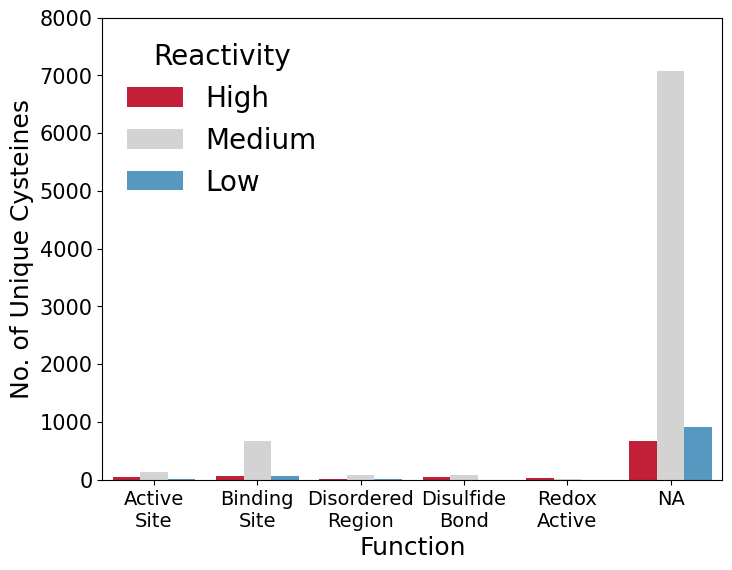

In [93]:
get_new_grouped_bar_plot(together_function_df, 
                 'Function', 'Count', 
                 'No. of Unique Cysteines',
                 'h_l_isotop_with_na', 
                 ['#dd0426', 'lightgrey', '#449dd1'], 20, 8000)

In [95]:
def get_new_grouped_bar_plot_h(df, xcol, ycol, ylabel, name, colors, sz, ylim):
    
    #create bar chart
    fig = plt.figure(figsize =(8, 6))
    
    sns.barplot(data=df, x=xcol, y=ycol, palette = colors, hue = 'Reactivity')
    
    plt.ylabel(ycol, size = sz)
    plt.xlabel(ylabel, size = sz)
    
    plt.yticks(size = sz) 
    plt.xticks(size = sz)
    
    plt.legend(frameon = False, loc = 'upper right', fontsize = 20, title = 'Reactivity', title_fontsize = 20)
    
    plt.savefig(date + '_' + name + '_grouped_function_h_barplot.png', dpi = 300, bbox_inches = "tight")
    plt.show()



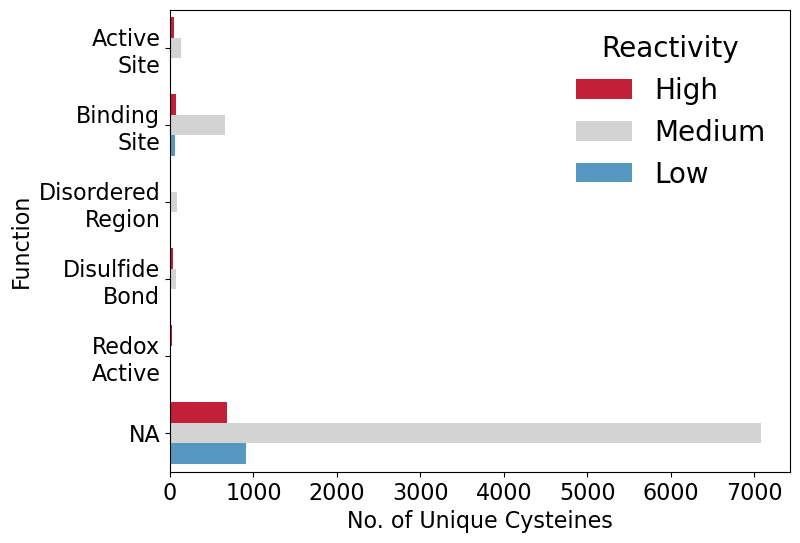

In [97]:
get_new_grouped_bar_plot_h(together_function_df, 
                 'Count', 'Function', 
                 'No. of Unique Cysteines',
                 'h_l_isotop_with_na_h', 
                 ['#dd0426', 'lightgrey', '#449dd1'], 16, 750)

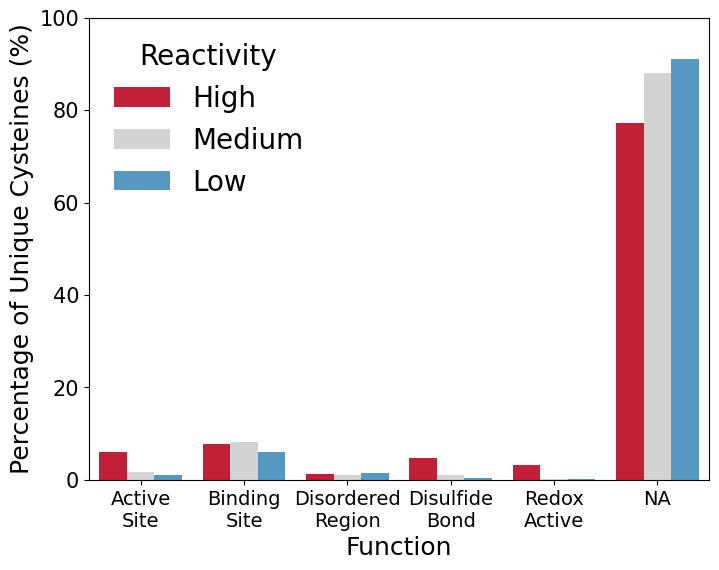

In [99]:
get_new_grouped_bar_plot(together_norm_function_df, 
                 'Function', 'Percent', 
                 'Percentage of Unique Cysteines (%)',
                 'h_l_isotop_with_na_percent', 
                 ['#dd0426', 'lightgrey', '#449dd1'], 18, 100)

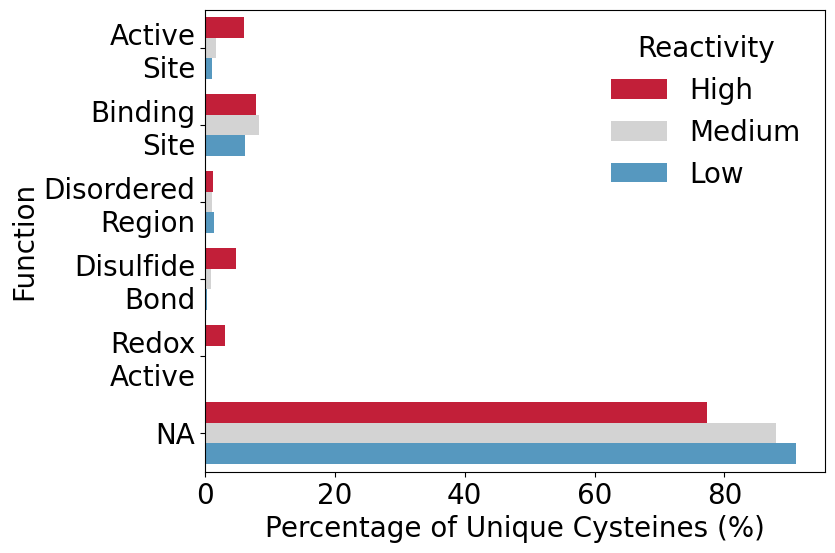

In [101]:
get_new_grouped_bar_plot_h(together_norm_function_df, 
                 'Percent', 'Function', 
                 'Percentage of Unique Cysteines (%)',
                 'h_l_isotop_with_na_h_percent', 
                 ['#dd0426', 'lightgrey', '#449dd1'], 20, 100)